In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

County_racial.csv from https://data.census.gov/cedsci/table?q=race&t=Race%20and%20Ethnicity&g=0100000US.050000_0500000US01001&y=2019&tid=ACSDT1Y2019.B02001&hidePreview=false

In [2]:
col_names = ['Geographic Name', 'Estimate Total', 'Margin of Error Total', 'Estimate Total: White', 'Margin of Error: White', 'Estimate Total: Black',
            'Margin of Error: Black', 'Estimate Total: Native', 'Margin of Error: Native', 'Estimate Total: Asian', 'Margin of Error: Asian', 'Estimate Total: Hawaiian/PI', 'Margin of Error: Hawaiian/PI',
            'Estimate Total: Other', 'Margin of Error: Other', 'Estimate Total: 2+', 'Margin of Error: 2+',]

county_race = pd.read_csv("county_racial.csv", names = col_names, usecols = list(range(1,18)))
county_race = county_race.iloc[2:]

county_race[["County", "State"]] = county_race["Geographic Name"].str.split(",", expand = True)

new_col_names = ['Geographic Name', 'County', 'State', 'Estimate Total', 'Margin of Error Total', 'Estimate Total: White', 'Margin of Error: White', 'Estimate Total: Black',
                 'Margin of Error: Black', 'Estimate Total: Native', 'Margin of Error: Native', 'Estimate Total: Asian', 'Margin of Error: Asian', 'Estimate Total: Hawaiian/PI', 'Margin of Error: Hawaiian/PI',
                 'Estimate Total: Other', 'Margin of Error: Other', 'Estimate Total: 2+', 'Margin of Error: 2+',]

county_race = county_race.reindex(columns = new_col_names)

new_col_names = ['Geographic Name', 'County', 'State', 'Estimate Total', 'Margin of Error Total', 'Estimate Total: White', 'Margin of Error: White', 'Estimate Total: Black',
                 'Margin of Error: Black', 'Estimate Total: Native', 'Margin of Error: Native', 'Estimate Total: Asian', 'Margin of Error: Asian', 'Estimate Total: Hawaiian/PI', 'Margin of Error: Hawaiian/PI',
                 'Estimate Total: Other', 'Margin of Error: Other', 'Estimate Total: 2+', 'Margin of Error: 2+',]

county_race = county_race[['Geographic Name', 'County', 'State', 'Estimate Total', 'Estimate Total: White', 'Estimate Total: Black',
                 'Estimate Total: Native', 'Estimate Total: Asian', 'Estimate Total: Hawaiian/PI',
                 'Estimate Total: Other', 'Estimate Total: 2+']]

county_race.head()
#note: margin of error total is empty: could probably find a dataset with total populations?? and merge in 
#note 2: the dataset has a lot of detailed columns at the end that i just cut off because not sure how important - 
#like 2 races including/not including other 

,Geographic Name,County,State,Estimate Total,Estimate Total: White,Estimate Total: Black,Estimate Total: Native,Estimate Total: Asian,Estimate Total: Hawaiian/PI,Estimate Total: Other,Estimate Total: 2+
2,"Baldwin County, Alabama",Baldwin County,Alabama,223234,190912,18338,2428,2160,0,4685,4711
3,"Calhoun County, Alabama",Calhoun County,Alabama,113605,82323,25226,201,225,85,3186,2359
4,"Cullman County, Alabama",Cullman County,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"DeKalb County, Alabama",DeKalb County,Alabama,71513,59305,688,792,17,339,8327,2045
6,"Elmore County, Alabama",Elmore County,Alabama,81209,61634,17768,204,884,0,216,503


In [3]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [4]:
county_covid_deaths = pd.read_csv("Provisional_COVID-19_Death_Counts_by_County_and_Race.csv")
#want to merge county name and state into one column titled "geographic name" to merge with county_race 

#convert state to full name 
county_covid_deaths['State'] = county_covid_deaths['State'].map(states).fillna(county_covid_deaths['State'])

#merge columns
county_covid_deaths['State'] = county_covid_deaths["County Name"] + ", " + county_covid_deaths['State']
county_covid_deaths = county_covid_deaths.drop('County Name', 1)

#same column name
county_covid_deaths.rename(columns={"State": "Geographic Name"}, inplace = True)
county_covid_deaths.head()

,Data as of,Start Date,End Date,Geographic Name,Urban Rural Code,FIPS State,FIPS County,FIPS Code,Indicator,Total deaths,COVID-19 Deaths,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic,Other,Urban Rural Description,Footnote
0,03/24/2021,01/01/2020,03/20/2021,"Anchorage Municipality, Alaska",3,2,20,2020,Distribution of all-cause deaths (%),2713,185,0.578,0.046,0.212,0.058,0.029,0.032,0.046,Medium metro,NaN
1,03/24/2021,01/01/2020,03/20/2021,"Anchorage Municipality, Alaska",3,2,20,2020,Distribution of COVID-19 deaths (%),2713,185,0.324,NaN,0.335,0.146,0.086,NaN,NaN,Medium metro,Data based on counts less than 10 suppressed
2,03/24/2021,01/01/2020,03/20/2021,"Anchorage Municipality, Alaska",3,2,20,2020,Distribution of population (%),2713,185,0.556,0.052,0.081,0.095,0.026,0.091,0.099,Medium metro,NaN
3,03/24/2021,01/01/2020,03/20/2021,"Baldwin County, Alabama",4,1,3,1003,Distribution of all-cause deaths (%),2851,243,0.902,0.078,NaN,NaN,NaN,0.013,NaN,Small metro,Data based on counts less than 10 suppressed
4,03/24/2021,01/01/2020,03/20/2021,"Baldwin County, Alabama",4,1,3,1003,Distribution of COVID-19 deaths (%),2851,243,0.860,0.115,NaN,NaN,NaN,NaN,NaN,Small metro,Data based on counts less than 10 suppressed


In [5]:
comb = pd.merge(county_race, county_covid_deaths, on = "Geographic Name")
comb.head()

,Geographic Name,County,State,Estimate Total,Estimate Total: White,Estimate Total: Black,Estimate Total: Native,Estimate Total: Asian,Estimate Total: Hawaiian/PI,Estimate Total: Other,...,COVID-19 Deaths,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic,Other,Urban Rural Description,Footnote
0,"Baldwin County, Alabama",Baldwin County,Alabama,223234,190912,18338,2428,2160,0,4685,...,243,0.902,0.078,NaN,NaN,NaN,0.013,NaN,Small metro,Data based on counts less than 10 suppressed
1,"Baldwin County, Alabama",Baldwin County,Alabama,223234,190912,18338,2428,2160,0,4685,...,243,0.860,0.115,NaN,NaN,NaN,NaN,NaN,Small metro,Data based on counts less than 10 suppressed
2,"Baldwin County, Alabama",Baldwin County,Alabama,223234,190912,18338,2428,2160,0,4685,...,243,0.832,0.086,0.007,0.011,0.001,0.047,0.017,Small metro,NaN
3,"Calhoun County, Alabama",Calhoun County,Alabama,113605,82323,25226,201,225,85,3186,...,274,0.819,0.167,NaN,NaN,NaN,0.008,NaN,Small metro,Data based on counts less than 10 suppressed
4,"Calhoun County, Alabama",Calhoun County,Alabama,113605,82323,25226,201,225,85,3186,...,274,0.792,0.197,NaN,NaN,NaN,NaN,NaN,Small metro,Data based on counts less than 10 suppressed


In [6]:
#data incomplete - doesn't have all counties (742)
merge_covid = pd.merge(county_covid_deaths[county_covid_deaths["Indicator"] == "Distribution of COVID-19 deaths (%)"], county_race, on ="Geographic Name")

#finding number of black covid deaths based on total number of deaths * proportion of black death from covid
merge_covid["# Black Covid Death"] = (merge_covid["COVID-19 Deaths"].astype(float) * merge_covid["Non-Hispanic Black"].astype(float))

#divide that number by total black people in county 
merge_covid["% Black Covid Death"] = merge_covid["# Black Covid Death"]/(merge_covid["Estimate Total: Black"]).astype(float)

merge_covid.head()

,Data as of,Start Date,End Date,Geographic Name,Urban Rural Code,FIPS State,FIPS County,FIPS Code,Indicator,Total deaths,...,Estimate Total,Estimate Total: White,Estimate Total: Black,Estimate Total: Native,Estimate Total: Asian,Estimate Total: Hawaiian/PI,Estimate Total: Other,Estimate Total: 2+,# Black Covid Death,% Black Covid Death
0,03/24/2021,01/01/2020,03/20/2021,"Anchorage Municipality, Alaska",3,2,20,2020,Distribution of COVID-19 deaths (%),2713,...,288000,180389,15207,25556,25976,8041,6490,26341,NaN,NaN
1,03/24/2021,01/01/2020,03/20/2021,"Baldwin County, Alabama",4,1,3,1003,Distribution of COVID-19 deaths (%),2851,...,223234,190912,18338,2428,2160,0,4685,4711,27.945,0.001524
2,03/24/2021,01/01/2020,03/20/2021,"Calhoun County, Alabama",4,1,15,1015,Distribution of COVID-19 deaths (%),2038,...,113605,82323,25226,201,225,85,3186,2359,53.978,0.002140
3,03/24/2021,01/01/2020,03/20/2021,"Cullman County, Alabama",5,1,43,1043,Distribution of COVID-19 deaths (%),1470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,03/24/2021,01/01/2020,03/20/2021,"DeKalb County, Alabama",6,1,49,1049,Distribution of COVID-19 deaths (%),943,...,71513,59305,688,792,17,339,8327,2045,NaN,NaN


I'm wondering if it would be useful to split the data further to have each race with its own row so we could have fewer columns and then could do some easier groupby (like group by race and county, or race and state). - Lucas

In [7]:
merge_covid["State"] = merge_covid["State"].str.lstrip()
merge_covid["County"] = merge_covid["County"].str.lstrip()

filtered = merge_covid[['Geographic Name','County', 'State', 'Indicator','Estimate Total', 'Estimate Total: White',
            'Estimate Total: Black','Estimate Total: Native','Estimate Total: Asian',
            'Estimate Total: Hawaiian/PI', 'Estimate Total: Other', 'Total deaths', 'COVID-19 Deaths', 'Non-Hispanic White',
            'Non-Hispanic Black', 'Non-Hispanic American Indian or Alaska Native',
            'Non-Hispanic Asian','Non-Hispanic Native Hawaiian or Other Pacific Islander', 
            'Hispanic','Other',  '% Black Covid Death']]

#filtered["State"] = filtered["State"].str.lstrip()
#filtered["County"] = filtered["County"].str.lstrip()

filtered = filtered.set_index(['State', 'County'])

ET_white = filtered[['Estimate Total: White', 'Non-Hispanic White']]
ET_white = ET_white.assign(Race = "White")
ET_white = ET_white.rename(columns={"Estimate Total: White" : "Estimated Total", 
                        "Non-Hispanic White" : "% of Covid Deaths"})

ET_black = filtered[['Estimate Total: Black', 'Non-Hispanic Black']]
ET_black = ET_black.assign(Race = "Black or African American")
ET_black = ET_black.rename(columns={"Estimate Total: Black" : "Estimated Total", 
                        "Non-Hispanic Black" : "% of Covid Deaths"})

ET_native = filtered[['Estimate Total: Native', 'Non-Hispanic American Indian or Alaska Native']]
ET_native = ET_native.assign(Race = "American Indian or Alaska Native")
ET_native = ET_native.rename(columns={"Estimate Total: Native" : "Estimated Total", 
                        "Non-Hispanic American Indian or Alaska Native" : "% of Covid Deaths"})

ET_asian = filtered[['Estimate Total: Asian', 'Non-Hispanic Asian']]
ET_asian = ET_asian.assign(Race = "Asian")
ET_asian = ET_asian.rename(columns={"Estimate Total: Asian" : "Estimated Total", 
                        "Non-Hispanic Asian" : "% of Covid Deaths"})

ET_hpi = filtered[['Estimate Total: Hawaiian/PI', 'Non-Hispanic Native Hawaiian or Other Pacific Islander']]
ET_hpi = ET_hpi.assign(Race = "Native Hawaiian or Other Pacific Islander")
ET_hpi = ET_hpi.rename(columns={"Estimate Total: Hawaiian/PI" : "Estimated Total", 
                        "Non-Hispanic Native Hawaiian or Other Pacific Islander" : "% of Covid Deaths"})

ET_totals = filtered[["COVID-19 Deaths"]]

new_stacked = pd.concat([ET_white, ET_black, ET_native, ET_asian, ET_hpi])
new_stacked["Estimated Total"] = new_stacked["Estimated Total"].astype('float').astype('Int64')

new_stacked = pd.merge(new_stacked, ET_totals, on=['State', 'County'])
new_stacked["Estimated # Covid Deaths"] = new_stacked["% of Covid Deaths"] * new_stacked['COVID-19 Deaths']

new_stacked = new_stacked.drop(columns = "COVID-19 Deaths")
#new_stacked = new_stacked[['County', 'State', 'Estimated Total', '% of Covid Deaths', 'Race', 'Estimated # Covid Deaths']]
new_stacked.loc[['Alabama','North Carolina']]

Estimated Total  % of Covid Deaths  \
State          County                                               
Alabama        Baldwin County           190912              0.860   
               Baldwin County            18338              0.115   
               Baldwin County             2428                NaN   
               Baldwin County             2160                NaN   
               Baldwin County                0                NaN   
...                                        ...                ...   
North Carolina Wake County              718463              0.562   
               Wake County              230927              0.322   
               Wake County                5266                NaN   
               Wake County               83883                NaN   
               Wake County                 262                NaN   

                                                                    Race  \
State          County                                                      
Alabama        Baldwin County                                      White   
               Baldwin County                  Black or African American   
               Baldwin County           American Indian or Alaska Native   
               Baldwin County                                      Asian   
               Baldwin County  Native Hawaiian or Other Pacific Islander   
...                                                                  ...   
North Carolina Wake County                                         White   
               Wake County                     Black or African American   
               Wake County              American Indian or Alaska Native   
               Wake County                                         Asian   
               Wake County     Native Hawaiian or Other Pacific Islander   

                               Estimated # Covid Deaths  
State          County                                    
Alabama        Baldwin County                   208.980  
               Baldwin County                    27.945  
               Baldwin County                       NaN  
               Baldwin County                       NaN  
               Baldwin County                       NaN  
...                                                 ...  
North Carolina Wake County                      238.850  
               Wake County                      136.850  
               Wake County                          NaN  
               Wake County                          NaN  
               Wake County                          NaN  

[190 rows x 4 columns]

In [8]:
new_stacked[new_stacked["Race"] != "White"].sort_values(by = "% of Covid Deaths", ascending=False)

Estimated Total  \
State                County                                    
Arizona              Apache County                     53480   
New Mexico           McKinley County                   53214   
Arizona              Coconino County                   37187   
District of Columbia District of Columbia             320704   
Maryland             Prince George's County           561709   
...                                                      ...   
Wyoming              Laramie County                     1002   
                     Laramie County                      226   
                     Natrona County                     1024   
                     Natrona County                      787   
                     Natrona County                        0   

                                             % of Covid Deaths  \
State                County                                      
Arizona              Apache County                       0.934   
New Mexico           McKinley County                     0.845   
Arizona              Coconino County                     0.788   
District of Columbia District of Columbia                0.690   
Maryland             Prince George's County              0.680   
...                                                        ...   
Wyoming              Laramie County                        NaN   
                     Laramie County                        NaN   
                     Natrona County                        NaN   
                     Natrona County                        NaN   
                     Natrona County                        NaN   

                                                                                  Race  \
State                County                                                              
Arizona              Apache County                    American Indian or Alaska Native   
New Mexico           McKinley County                  American Indian or Alaska Native   
Arizona              Coconino County                  American Indian or Alaska Native   
District of Columbia District of Columbia                    Black or African American   
Maryland             Prince George's County                  Black or African American   
...                                                                                ...   
Wyoming              Laramie County                                              Asian   
                     Laramie County          Native Hawaiian or Other Pacific Islander   
                     Natrona County                          Black or African American   
                     Natrona County                                              Asian   
                     Natrona County          Native Hawaiian or Other Pacific Islander   

                                             Estimated # Covid Deaths  
State                County                                            
Arizona              Apache County                             99.004  
New Mexico           McKinley County                          158.015  
Arizona              Coconino County                          197.000  
District of Columbia District of Columbia                     893.550  
Maryland             Prince George's County                   761.600  
...                                                               ...  
Wyoming              Laramie County                               NaN  
                     Laramie County                               NaN  
                     Natrona County                               NaN  
                     Natrona County                               NaN  
                     Natrona County                               NaN  

[2584 rows x 4 columns]

president_county_candidate = https://www.kaggle.com/unanimad/us-election-2020?select=president_county_candidate.csv

In [9]:
#load in dataset
president_county_candidate = pd.read_csv("president_county_candidate.csv")
president_county_candidate = president_county_candidate.sort_values("state")

president_county_candidate = president_county_candidate.rename(columns = {"state":"State", "county":"County"})

president_county_candidate.head()

,State,County,candidate,party,total_votes,won
27958,Alabama,Cherokee County,Donald Trump,REP,10583,True
28128,Alabama,Mobile County,Jo Jorgensen,LIB,1938,False
28129,Alabama,Mobile County,Write-ins,WRI,509,False
28130,Alabama,Bibb County,Donald Trump,REP,7525,True
28131,Alabama,Bibb County,Joe Biden,DEM,1986,False


In [10]:
#this chunk finds the total number of votes in each county
group_president_county_candidate = president_county_candidate.groupby(['State', 'County']).sum()
group_president_county_candidate.head()

total_votes  won
State   County                          
Alabama Autauga County        27770    1
        Baldwin County       109679    1
        Barbour County        10518    1
        Bibb County            9595    1
        Blount County         27588    1

In [11]:
#this chunk finds the winning candidate in each county
groupParty_president_county_candidate = president_county_candidate.groupby(['State','County', "candidate"])

#the code below was used to check winner was calculated correctly
#groupParty_president_county_candidateEXAMPLE = president_county_candidate.groupby(['state','county', "candidate"]).max()
#groupParty_president_county_candidateEXAMPLE.head()

groupParty_president_county_candidate = groupParty_president_county_candidate.filter(lambda x: x['won'] == True)
groupParty_president_county_candidate = groupParty_president_county_candidate.sort_values(["State", "County"])
groupParty_president_county_candidate.head()

,State,County,candidate,party,total_votes,won
27998,Alabama,Autauga County,Donald Trump,REP,19838,True
28042,Alabama,Baldwin County,Donald Trump,REP,83544,True
28086,Alabama,Barbour County,Donald Trump,REP,5622,True
28130,Alabama,Bibb County,Donald Trump,REP,7525,True
28174,Alabama,Blount County,Donald Trump,REP,24711,True


In [12]:
#not all counties are red or blue, so organized rest into "OTHER"
groupParty_president_county_candidate["party"] = np.where(groupParty_president_county_candidate["party"] == "LIB", "OTHER",groupParty_president_county_candidate["party"] )
groupParty_president_county_candidate["party"] = np.where(groupParty_president_county_candidate["party"] == "WRI", "OTHER",groupParty_president_county_candidate["party"] )

print(groupParty_president_county_candidate.groupby("party").sum())

       total_votes   won
party                   
DEM       59402371  1410
OTHER        32576     4
REP       41137685  3219


In [13]:
#calculates percent of winning candidate votes in each county
groupParty_president_county_candidate = groupParty_president_county_candidate.groupby(['State','County']).max()
groupParty_president_county_candidate["winner_percent"] =  groupParty_president_county_candidate["total_votes"]/group_president_county_candidate["total_votes"]
groupParty_president_county_candidate = groupParty_president_county_candidate[["party", "winner_percent"]]

groupParty_president_county_candidate.head()

party  winner_percent
State   County                              
Alabama Autauga County   REP        0.714368
        Baldwin County   REP        0.761714
        Barbour County   REP        0.534512
        Bibb County      REP        0.784263
        Blount County    REP        0.895716

In [14]:
#merge covid by race by county dataset with party by county dataset based on counties in new_stacked
covid_party = pd.merge(new_stacked, groupParty_president_county_candidate, on = ["State", "County"])
covid_party.head()

Estimated Total  % of Covid Deaths  \
State   County                                               
Alabama Baldwin County           190912              0.860   
        Baldwin County            18338              0.115   
        Baldwin County             2428                NaN   
        Baldwin County             2160                NaN   
        Baldwin County                0                NaN   

                                                             Race  \
State   County                                                      
Alabama Baldwin County                                      White   
        Baldwin County                  Black or African American   
        Baldwin County           American Indian or Alaska Native   
        Baldwin County                                      Asian   
        Baldwin County  Native Hawaiian or Other Pacific Islander   

                        Estimated # Covid Deaths party  winner_percent  
State   County                                                          
Alabama Baldwin County                   208.980   REP        0.761714  
        Baldwin County                    27.945   REP        0.761714  
        Baldwin County                       NaN   REP        0.761714  
        Baldwin County                       NaN   REP        0.761714  
        Baldwin County                       NaN   REP        0.761714

In [15]:
cp = covid_party.reset_index()
cp_nc = cp[cp["State"]=="North Carolina"]
total_pop_nc = cp_nc.groupby('County')['Estimated Total'].sum()
cp_nc = pd.merge(cp_nc, total_pop_nc, how='outer', on='County', suffixes=('', ' (All Races)')) 
cp_nc['% Total Population'] = cp_nc['Estimated Total']/cp_nc['Estimated Total (All Races)']
total_pop = cp.groupby('County')['Estimated Total'].sum()
cp = pd.merge(cp, total_pop, how='outer', on='County', suffixes=('', ' (All Races)')) 
cp['% Total Population'] = cp['Estimated Total']/cp['Estimated Total (All Races)']#*100

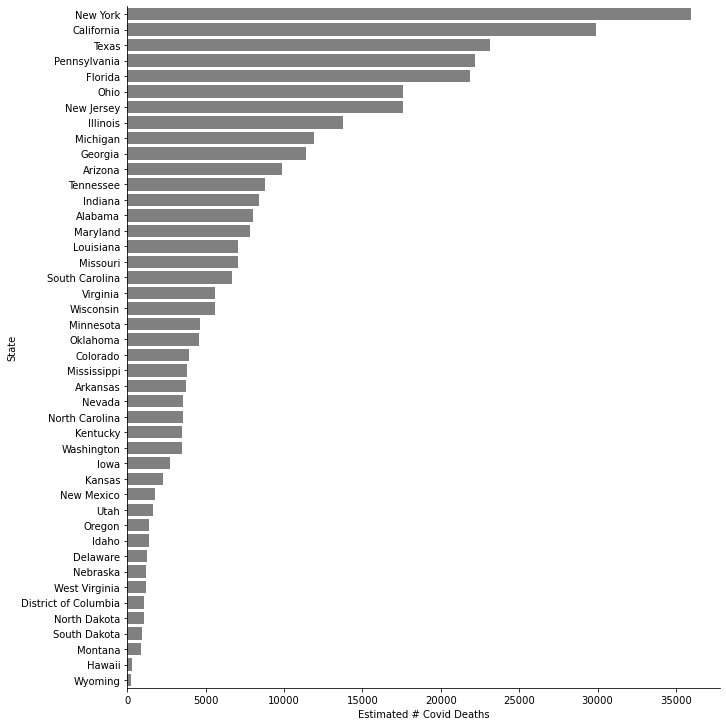

In [16]:
cp_total_deaths = cp.groupby('State')['Estimated # Covid Deaths'].sum().reset_index()
cp_total_deaths = cp_total_deaths.sort_values(by="Estimated # Covid Deaths", ascending=False)
sns.catplot(data=cp_total_deaths, x='Estimated # Covid Deaths', y='State', kind="bar", color="gray", height=10)

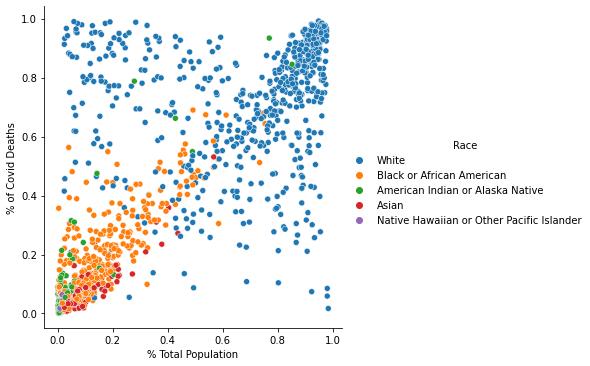

In [17]:
sns.relplot(data=cp, x='% Total Population', y='% of Covid Deaths', hue='Race')

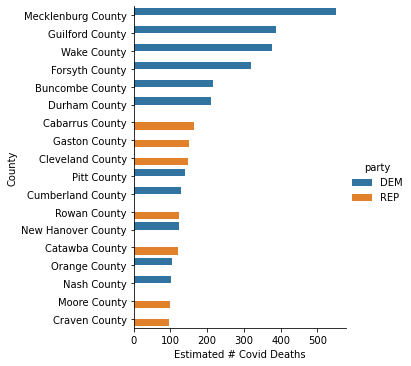

In [18]:
cp_total_deaths_nc = cp_nc.groupby('County')['Estimated # Covid Deaths'].sum().reset_index()
cp_nc_party = cp_nc[['County', 'party']].drop_duplicates()
cp_total_deaths_nc = pd.merge(cp_total_deaths_nc, cp_nc_party)
cp_total_deaths_nc = cp_total_deaths_nc.sort_values(by="Estimated # Covid Deaths", ascending=False)
sns.catplot(data=cp_total_deaths_nc, y="County", x="Estimated # Covid Deaths", kind="bar", hue="party")

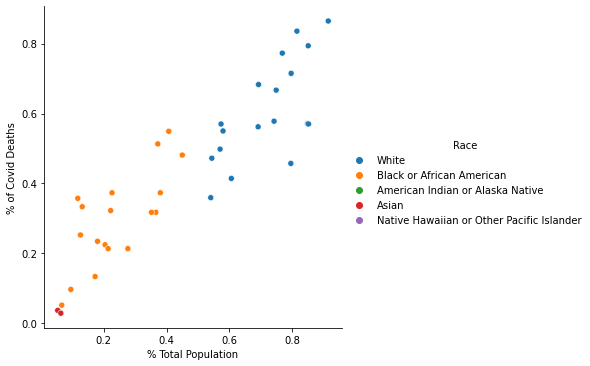

In [19]:
sns.relplot(data=cp_nc, x='% Total Population', y='% of Covid Deaths', hue='Race')

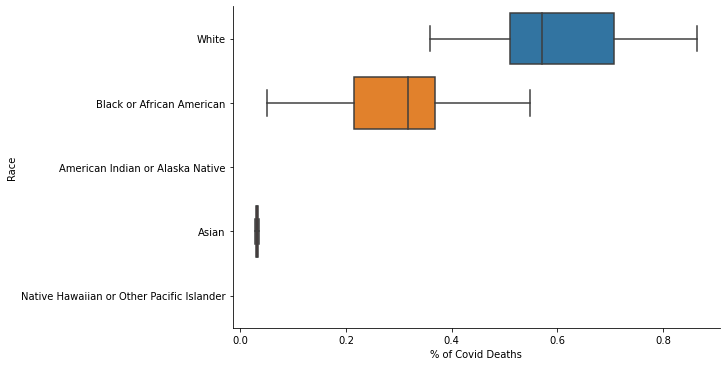

In [20]:
sns.catplot(data=cp_nc, y='Race', x='% of Covid Deaths', kind='box', aspect=2)

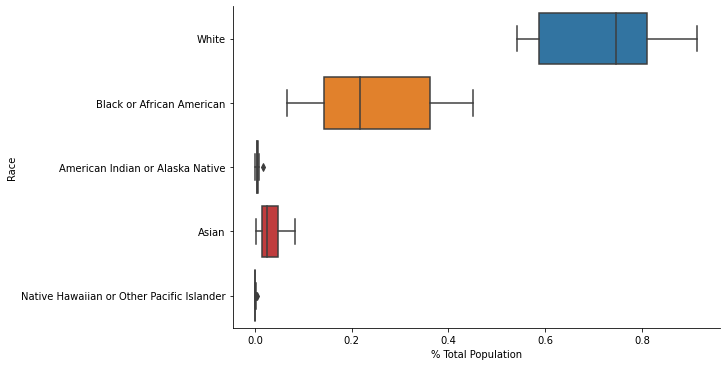

In [21]:
sns.catplot(data=cp_nc, y='Race', x='% Total Population', kind='box', aspect=2)